**INTRODUCTION**
the data set is about
happiness describe the content


In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt  #for data visualization


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#load data from csv file
data_2015=pd.read_csv('/content/drive/MyDrive/data-happiess/2015.csv')
data_2016=pd.read_csv('/content/drive/MyDrive/data-happiess/2016.csv')
data_2017=pd.read_csv('/content/drive/MyDrive/data-happiess/2017.csv')
#columns name change
data_2015.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2015.columns]
data_2016.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2016.columns]
data_2017.columns=[each.replace("."," ") for each in data_2017.columns]
data_2017.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2017.columns]



In [8]:
data_2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [9]:
#getting an overview of our data
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Happiness_Rank     158 non-null    int64  
 3   Happiness_Score    158 non-null    float64
 4   Standard_Error     158 non-null    float64
 5   Economy            158 non-null    float64
 6   Family             158 non-null    float64
 7   Health             158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Trust              158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [10]:
print("Are There Missing Data? :",data_2015.isnull().any().any())
print(data_2015.isnull().sum())

Are There Missing Data? : False
Country              0
Region               0
Happiness_Rank       0
Happiness_Score      0
Standard_Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64


There is no missing data in our dataset

In [11]:
data_2015["Happiness_Score"].value_counts()

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness_Score, Length: 157, dtype: int64

In [12]:
#we found out how many hospital country in our data
print("\n\nRegion in Dataset:\n")
print("There are {} different values\n".format(len(data_2015.Region.unique())))
print(data_2015.Region.unique())



Region in Dataset:

There are 10 different values

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


* We found unique region names in our dataset and we calculated the happiness rate according to the regions and created a dataframe in descending order.

In [13]:
region_lists=list(data_2015['Region'].unique())
region_happiness_ratio=[]
for each in region_lists:
    region=data_2015[data_2015['Region']==each]
    region_happiness_rate=sum(region.Happiness_Score)/len(region)
    region_happiness_ratio.append(region_happiness_rate)

data=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index=(data['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

sorted_data

,region,region_happiness_ratio
2,Australia and New Zealand,7.285000
1,North America,7.273000
0,Western Europe,6.689619
4,Latin America and Caribbean,6.144682
7,Eastern Asia,5.626167
3,Middle East and Northern Africa,5.406900
6,Central and Eastern Europe,5.332931
5,Southeastern Asia,5.317444
9,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800


<a id=2></a>
**<h1>Bar Plot</h1>**
What are the happiest regions of the world in 2015?


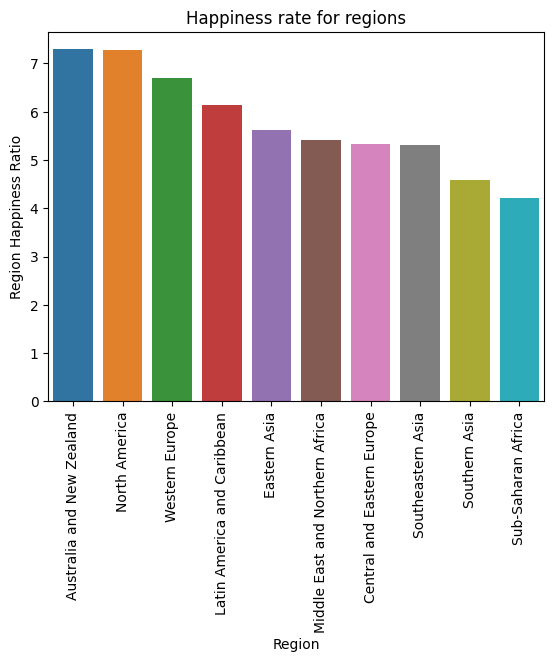

In [17]:

sns.barplot(x=sorted_data['region'], y=sorted_data['region_happiness_ratio'])
# Place the region names at a 90-degree angle.
plt.xticks(rotation= 90)
plt.xlabel('Region')
plt.ylabel('Region Happiness Ratio')
plt.title('Happiness rate for regions')
plt.show()

According to the region, what is the effect of the economy on the happiness score?


In [15]:
#meaningless data control
#data_2015["Economy"].value_counts()

In [19]:
region_lists=list(data_2015['Region'].unique())
region_economy_ratio=[]
for each in region_lists:
    region=data_2015[data_2015['Region']==each]
    region_economy_rate=sum(region.Economy)/len(region)
    region_economy_ratio.append(region_economy_rate)

data_economy=pd.DataFrame({'region':region_lists,'region_economy_ratio':region_economy_ratio})
new_index_economy=(data_economy['region_economy_ratio'].sort_values(ascending=True)).index.values
sorted_data_economy = data_economy.reindex(new_index_economy)
sorted_data_economy.head()

,region,region_economy_ratio
8,Sub-Saharan Africa,0.380473
9,Southern Asia,0.560486
5,Southeastern Asia,0.789054
4,Latin America and Caribbean,0.876815
6,Central and Eastern Europe,0.942438


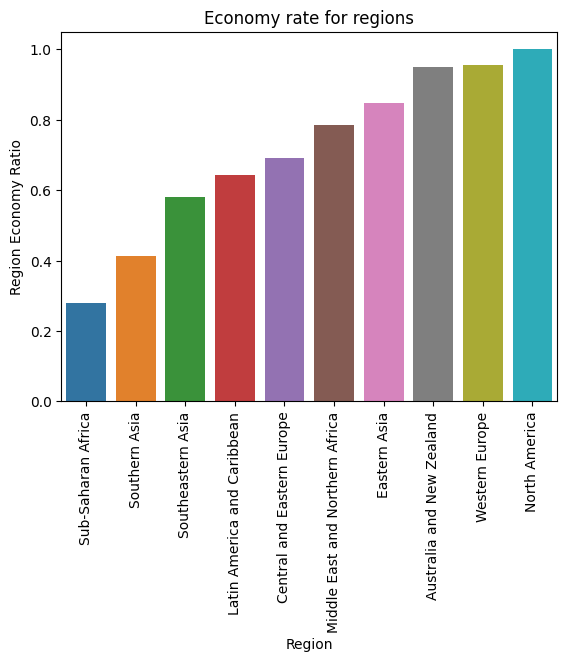

In [26]:

sns.barplot(x=sorted_data_economy['region'], y=sorted_data_economy['region_economy_ratio'])
# Place the region names at a 90-degree angle.
plt.xticks(rotation= 90)
plt.xlabel('Region')
plt.ylabel('Region Economy Ratio')
plt.title('Economy rate for regions')
plt.show()

* What is the ratio of the factors affecting the Happiness Score according to the regions?

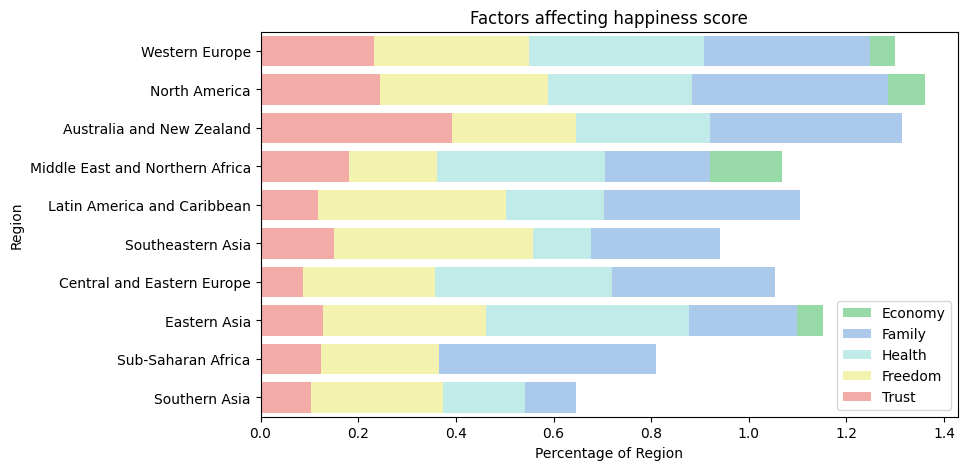

In [21]:
#Horizontal bar plot
region_lists=list(data_2015['Region'].unique())
share_economy=[]
share_family=[]
share_health=[]
share_freedom=[]
share_trust=[]
for each in region_lists:
    region=data_2015[data_2015['Region']==each]
    share_economy.append(sum(region.Economy)/len(region))
    share_family.append(sum(region.Family)/len(region))
    share_health.append(sum(region.Health)/len(region))
    share_freedom.append(sum(region.Freedom)/len(region))
    share_trust.append(sum(region.Trust)/len(region))
#Visualization
f,ax = plt.subplots(figsize = (9,5))
sns.set_color_codes("pastel")
sns.barplot(x=share_economy,y=region_lists,color='g',label="Economy")
sns.barplot(x=share_family,y=region_lists,color='b',label="Family")
sns.barplot(x=share_health,y=region_lists,color='c',label="Health")
sns.barplot(x=share_freedom,y=region_lists,color='y',label="Freedom")
sns.barplot(x=share_trust,y=region_lists,color='r',label="Trust")
ax.legend(loc="lower right",frameon = True)
ax.set(xlabel='Percentage of Region', ylabel='Region',title = "Factors affecting happiness score")
plt.show()

<a id=2></a>
**<h1>Point Plot</h1>**
* The rate of happiness score and the rate of economy affecting happiness score

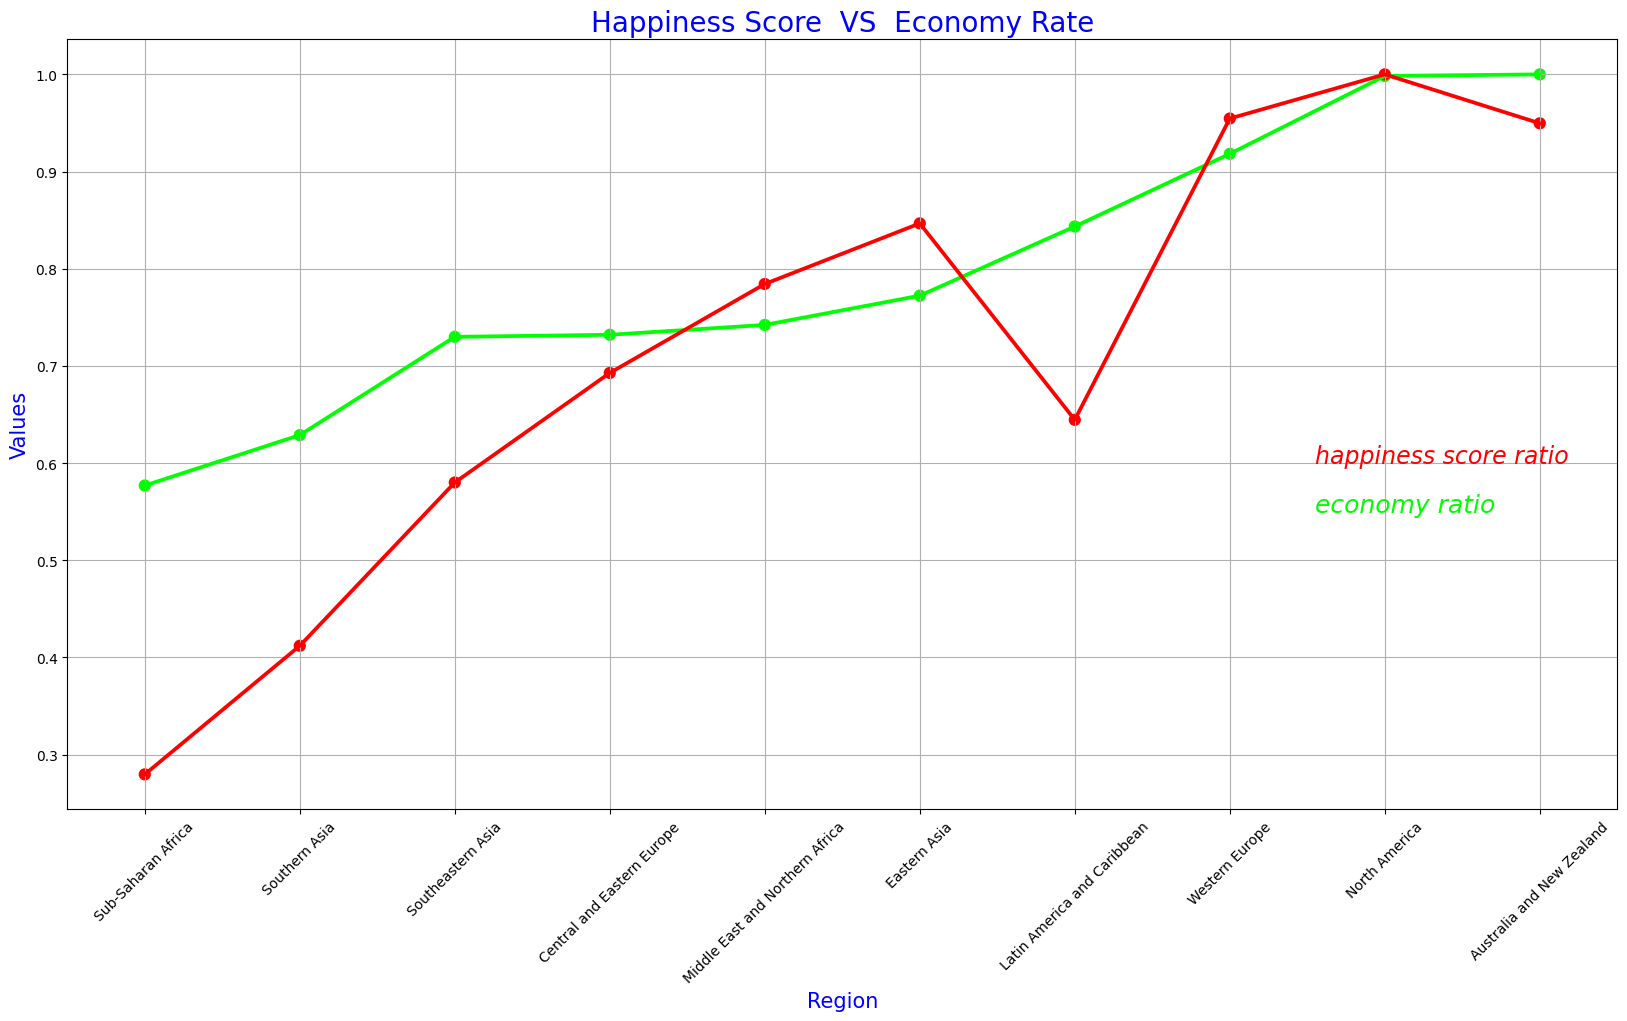

In [28]:
sorted_data['region_happiness_ratio']=sorted_data['region_happiness_ratio']/max(sorted_data['region_happiness_ratio'])
sorted_data_economy['region_economy_ratio']=sorted_data_economy['region_economy_ratio']/max(sorted_data_economy['region_economy_ratio'])

data=pd.concat([sorted_data,sorted_data_economy['region_economy_ratio']],axis=1)
data.sort_values('region_happiness_ratio',inplace=True)

#Visualization
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='region',y='region_happiness_ratio',data=data,color='lime')
sns.pointplot(x='region',y='region_economy_ratio',data=data,color='red')
plt.text(7.55,0.6,'happiness score ratio',color='red',fontsize = 17,style = 'italic')
plt.text(7.55,0.55,'economy ratio',color='lime',fontsize = 18,style = 'italic')
plt.xticks(rotation=45)
plt.xlabel('Region',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('Happiness Score  VS  Economy Rate',fontsize = 20,color='blue')
plt.grid()
plt.show()